## Observations and Insights 

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [101]:
# Checking the number of mice.
total_mice = data_df["Mouse ID"].nunique()
total_mice

249

In [102]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

data_df.loc[data_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [103]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

data_df = data_df.loc[data_df["Mouse ID"] != 'g989']

In [105]:
# Checking the number of mice in the clean DataFrame.
data_df["Mouse ID"].nunique()

248

## Summary Statistics

In [106]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

summary_df = data_df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_mean = summary_df["Tumor Volume (mm3)"].mean()
tumor_median = summary_df["Tumor Volume (mm3)"].median()
tumor_stdev = summary_df["Tumor Volume (mm3)"].std()
tumor_sem = summary_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

summary_grouped_df = pd.DataFrame({"Mean": tumor_mean, "Median": tumor_median,
                                   "Standard Deviation": tumor_stdev, "SEM": tumor_sem})

summary_grouped_df.head()

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


In [107]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ["mean", "median", "std", "sem"]})

Tumor Volume (mm3)                               
                           mean     median       std       sem
Drug Regimen                                                  
Capomulin             40.675741  41.557809  4.994774  0.329346
Ceftamin              52.591172  51.776157  6.268188  0.469821
Infubinol             52.884795  51.820584  6.567243  0.492236
Ketapril              55.235638  53.698743  8.279709  0.603860
Naftisol              54.331565  52.509285  8.134708  0.596466
Placebo               54.033581  52.288934  7.821003  0.581331
Propriva              52.320930  50.446266  6.622085  0.544332
Ramicane              40.216745  40.673236  4.846308  0.320955
Stelasyn              54.233149  52.431737  7.710419  0.573111
Zoniferol             53.236507  51.818479  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Total Number of Measurements')

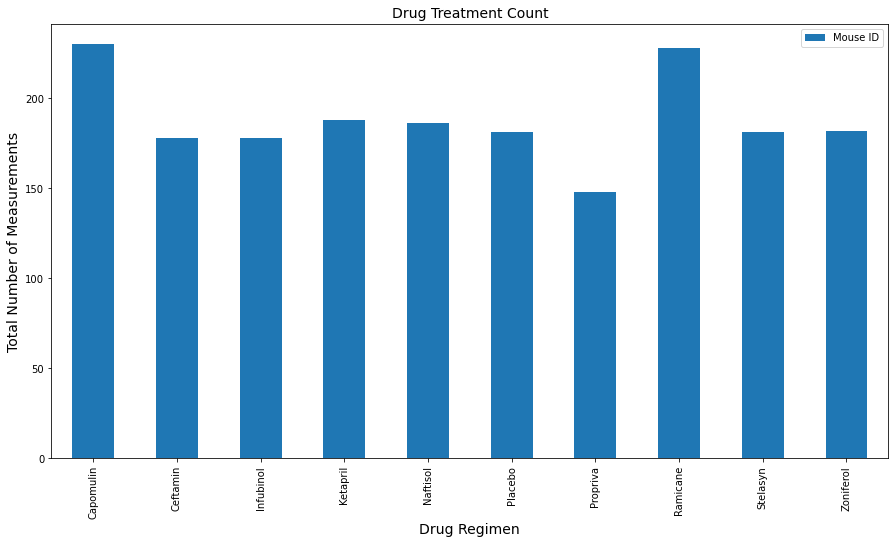

In [131]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

measurments_df = pd.DataFrame(data_df.groupby('Drug Regimen')['Mouse ID'].count())

measurments_df.plot(kind="bar", figsize=(15,8))

plt.title("Drug Treatment Count", fontsize=14)
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Total Number of Measurements", fontsize=14)

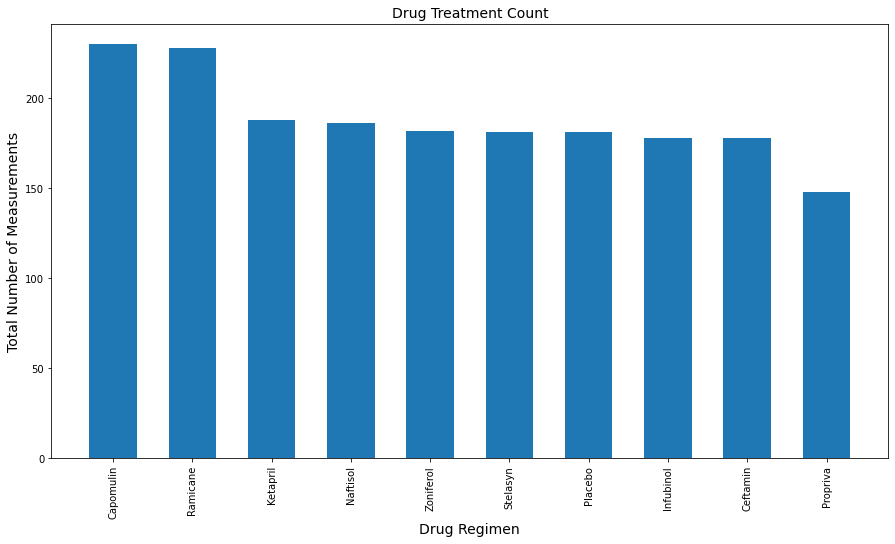

In [138]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_count = data_df["Drug Regimen"].value_counts()

x_axis = np.arange(len(drug_count))

plt.figure(figsize=(15,8))

plt.bar(x_axis, drug_count, width=.6)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_count.index.values, rotation="vertical")

plt.title("Drug Treatment Count", fontsize=14)
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Total Number of Measurements", fontsize=14)

plt.show()

Text(0, 0.5, '')

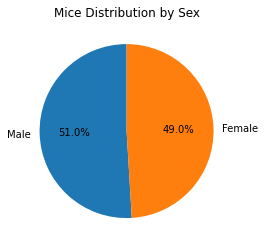

In [120]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = data_df["Sex"].value_counts()

plot = gender_df.plot.pie(autopct='%1.1f%%', startangle=90, title="Mice Distribution by Sex")

# Hide the 'y' label
plot.set_ylabel("")

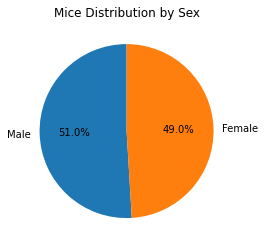

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_df = data_df["Sex"].value_counts()

plt.pie(gender_df, labels=["Male", "Female"], autopct='%1.1f%%', startangle=90)
plt.title("Mice Distribution by Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

timepoint_df = data_df.groupby("Mouse ID")["Timepoint"].max().to_frame().reset_index()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

timepoint_merge_df = data_df.merge(timepoint_df)

timepoint_merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [43]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    
    print(f"For drug regimen: {treatment}:")
    volume = data_df.loc[data_df['Drug Regimen'] == treatment]["Tumor Volume (mm3)"]
    volume_list.append(volume)
    
    quartiles = volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    print(f"The lower quartile volume is: {lowerq}")
    print(f"The upper quartile volume is: {upperq}")
    print(f"The interquartile range of volume is: {iqr}")
    print(f"The median of volume is: {quartiles[0.5]}")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq +(1.5*iqr)
    
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("=============")
    
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

For drug regimen: Capomulin:
The lower quartile volume is: 37.685932865
The upper quartile volume is: 45.0
The interquartile range of volume is: 7.314067135000002
The median of volume is: 41.557808879999996
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.
For drug regimen: Ramicane:
The lower quartile volume is: 36.67463458499999
The upper quartile volume is: 45.0
The interquartile range of volume is: 8.325365415000007
The median of volume is: 40.67323554
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.
For drug regimen: Infubinol:
The lower quartile volume is: 47.3123533
The upper quartile volume is: 57.314443967500004
The interquartile range of volume is: 10.002090667500006
The median of volume is: 51.82058438
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.
For drug regimen: Ceftamin:
The lower quartile volume is: 47.208427112500004
T

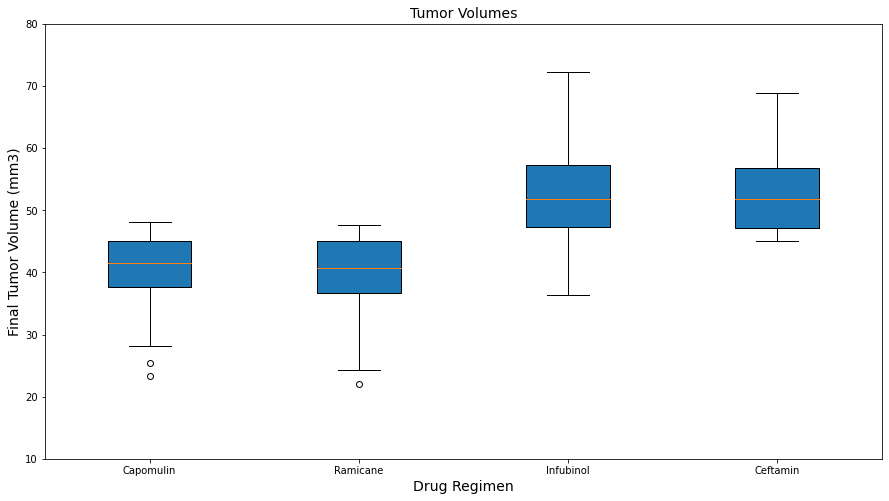

In [141]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data = volume_list

fig, ax = plt.subplots(figsize=(15, 8))

ax.set_title('Tumor Volumes', fontsize = 14)
ax.set_ylabel('Final Tumor Volume (mm3)', fontsize = 14)
ax.set_xlabel('Drug Regimen',fontsize = 14)
ax.boxplot(data, labels=treatments, widths = 0.4, patch_artist=True, vert=True)

plt.ylim(10, 80)

plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Mouse s185 Treatment')

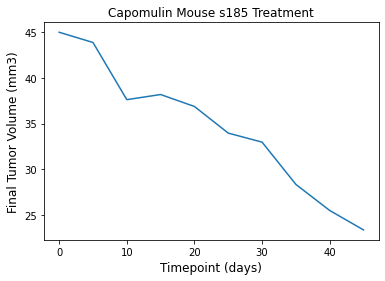

In [147]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_lineplot = data_df.loc[data_df["Mouse ID"] == 's185']

plt.plot(capomulin_lineplot["Timepoint"], capomulin_lineplot["Tumor Volume (mm3)"])

plt.xlabel("Timepoint (days)", fontsize= 12)
plt.ylabel('Final Tumor Volume (mm3)', fontsize= 12)
plt.title('Capomulin Mouse s185 Treatment', fontsize= 12)

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


plt.scatter

plt.xlabel
plt.ylabel
plt.title

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
